## Overview

Generating something out of nothing is a computationally internsive process, especially if you're running inference over and over again wihtout less powerful computing resources. This is why it's important to get the most computational(speed) and memory(GPU RAM) efficiently from the pipline to reduce the time between inference cycles so we can iterate faster. This notebook container how to generate faster and better with the Diffusion pipeline.

## Preparing

### Installing all the dependencies

In [ ]:
!pip install diffusers["torch",'flax'] transformers

### Defining the backend for pytorch

In [1]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [2]:
torch_device

'mps'

### Enable mps fallback to cpu

In [3]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

### Loading the Stable Diffusion model

In [5]:
from diffusers import DiffusionPipeline

model_id="runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### Prompt

In [10]:
prompt = "portrait photo of master sword in Zelda: Breath of the Wild"

## Tips for Speeding up Inference

1.One of the simplest wat to speed up infernece is to palce the pipeline on a GPU.

In [7]:
pipeline = pipeline.to(torch_device)

2.To make sure you can use the same image and improve on it, use a *Generator* and set a speed for *reproducibility*.

In [8]:
import torch
generator = torch.Generator(device=torch_device).manual_seed(0)

Let's try to generate an image:

  0%|          | 0/50 [00:00<?, ?it/s]

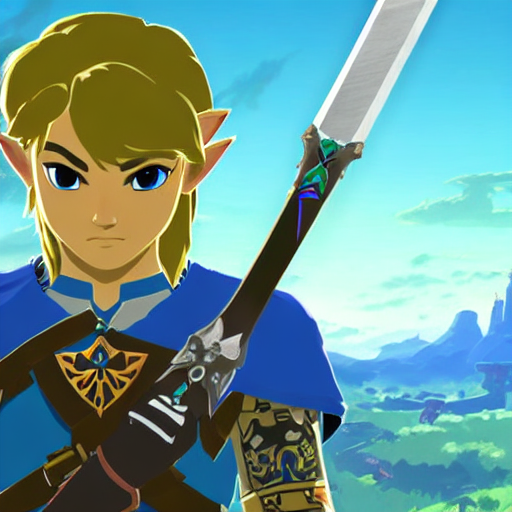

In [11]:
image = pipeline(prompt, generator=generator).images[0]
image

This process took ~30s on a T4 GPU(from official document), 43.2s from M1 GPU. By default, the DiffusionPipeline runs inference with full float32 precision for 50 inference steps. We can speed up by switching to a lower precision like float16 or running fewer inference steps. For example we load the model in float16 and generate an image